# IF240 - Machine Learning and deep learning

## TP 3 - Support Vector Machines (SVM)

By Michaël Clément and Aurélie Bugeau

Credits: Vincent Lepetit

### Objectives 

The objective of the practice is to apply SVM with different kernels.

You will use two classical synthetic datasets provided by `sklearn`: `two moons` and `two circles`.

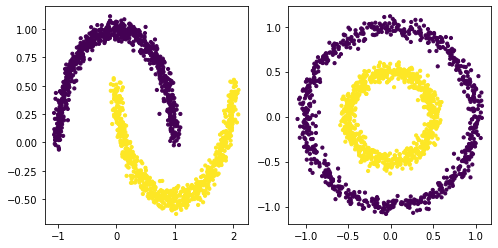

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_circles

X_moons, y_moons = make_moons(n_samples=1500, noise=0.05, random_state=0)
X_circles, y_circles = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)

plt.figure(figsize=(8, 4))
plt.subplot(121); plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=10, cmap='viridis')
plt.subplot(122); plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s=10, cmap='viridis')

### Question 1
Explain what the variables `X_moons`, `y_moons`, `X_circles` and `y_circles` contain exactly

Separate the data into training and test data with:

In [48]:
indices = np.random.permutation(len(X_moons))
X_moons_train = X_moons[indices[:-40]]
y_moons_train = y_moons[indices[:-40]]
X_moons_valid = X_moons[indices[-40:-20]]
y_moons_valid = y_moons[indices[-40:-20]]
X_moons_test  = X_moons[indices[-20:]]
y_moons_test  = y_moons[indices[-20:]]

In [49]:
X_circles_train = X_circles[indices[:-40]]
y_circles_train = y_circles[indices[:-40]]
X_circles_valid = X_circles[indices[-40:-20]]
y_circles_valid = y_circles[indices[-40:-20]]
X_circles_test  = X_circles[indices[-20:]]
y_circles_test  = y_circles[indices[-20:]]

## Linear SVM
### Question 2
Apply linear SVM to the two training sets, and report the accuracy on the test sets.

In [50]:
from sklearn import svm


def calculate_accuracy(w,X_train, y_train, X_test ,y_test) :
    #train the model 
    w.fit(X_train, y_train)
    #Calculate accurary
    return w.score(X_test, y_test)


svc = svm.SVC(kernel='linear')

print("Accuracy Moons=",calculate_accuracy(svc,X_moons_train,y_moons_train,X_moons_test,y_moons_test))
print("Accuracy Circles=",calculate_accuracy(svc,X_circles_train,y_circles_train,X_circles_test,y_circles_test))


Accuracy Moons= 0.9
Accuracy Circles= 0.65


### Question 3
Check the documentation at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC to see how to change the parameter $C$, the weight between the classification score and the regularization term.

Use the validation sets to identify the optimal value for $C$ and print the value of the corresponding on the test set.

In [70]:
def calculate_optimal_param (values, kernel, X_train, y_train, X_valid, y_valid):
    optimal_param = values[0]
    optimal_accuracy = 0

    for c in values: 
        svc = svm.SVC(C=c, kernel=kernel)
        accuracy = calculate_accuracy(svc, X_train, y_train, X_valid, y_valid)
        if accuracy > optimal_accuracy:
            optimal_accuracy = accuracy
            optimal_param = c
    
    return optimal_param

values = np.linspace(0.1,100,10)

#calculate the optimal c
c_moons = calculate_c_optimal(values, 'linear', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
c_circles = calculate_c_optimal(values,'linear', X_circles_train, y_circles_train, X_circles_valid, y_circles_valid)

#generate the model according to  the optimal c
svc = svm.SVC(C=c_moons, kernel='linear')
svc = svm.SVC(C=c_circles, kernel='linear')

#display the results
print("Moons: c_optimal =", c_moons,
      ", Accuracy=",calculate_accuracy(svc, X_moons_train, y_moons_train, X_moons_test, y_moons_test))
print("Circles: c_optimal =", c_circles,
     ", Accuracy=",calculate_accuracy(svc, X_circles_train, y_circles_train, X_circles_test, y_circles_test))

Moons: c_optimal = 0.1 , Accuracy= 0.85
Circles: c_optimal = 0.1 , Accuracy= 0.5


### Question 4
Let us visualize the result. For visualizing in 2D  the effect of an SVM classifier, you are given the following functions

In [40]:
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

The visualization functions can be used in the following way. Classification of every point on the meshgrid is made. Explain the result

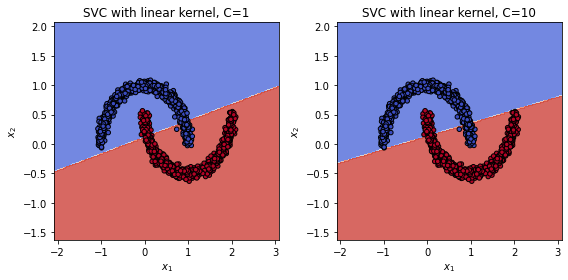

In [41]:
X_test = X_moons_train
y_test = y_moons_train

models = (svm.SVC(kernel='linear', C=0.1),
          svm.SVC(kernel='linear', C=100))
models = (clf.fit(X_test, y_test) for clf in models)

# title for the plots
titles = ('SVC with linear kernel, C=1',
          'SVC with linear kernel, C=10')

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(8, 4))

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for i, (clf, title) in enumerate(zip(models, titles)):
    ax = plt.subplot(1, 2, i+1)
    plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)

plt.tight_layout()


## Non-Linear SVM

You can now create a non-linear support vector machine classifier with Gaussian kernels. See if you can tune $C$ and $\gamma$, the standard deviation of the kernels to improve the classification results on the two datasets.

Print the classification results (accuracy) and plot the datasets with the decision boundaries.

Next, you can experiment with the polynomial kernel.

####################### Moons Classifications ####################


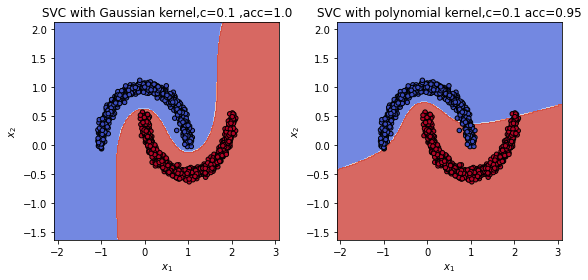

In [98]:
def plot_datasets(X_test,y_test,models,titles):
    #train the models
    models = [clf.fit(X_test, y_test) for clf in models]
    
    fig, sub = plt.subplots(1, 2, figsize=(8, 4))

    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for i, (clf, title) in enumerate(zip(models, titles)):
        ax = plt.subplot(1, 2, i+1)
        plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
        plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.title(title)

    plt.tight_layout()
    
################  Moons Classifications ##########
    
X_test = X_moons_train
y_test = y_moons_train

#calculate the optimal c    
c_rbf=calculate_optimal_param(values,'rbf',X_test, y_test, X_moons_valid, y_moons_valid)   
c_poly = calculate_optimal_param(values, 'poly', X_test, y_test, X_moons_valid, y_moons_valid)

#calculate the optimal gamma
values2 = np.linspace(0.01, 10, 10)
gamma_rbf = calculate_optimal_param(values2, 'rbf', X_test, y_test, X_moons_valid, y_moons_valid)
gamma_poly = calculate_optimal_param(values2, 'poly', X_test, y_test, X_moons_valid, y_moons_valid)

#generate the model according to  the optimal c and the optimal gamma
svc_rbf=svm.SVC(C=c_rbf, gamma = gamma_rbf, kernel='rbf')
svc_poly=svm.SVC(C=c_poly, gamma = gamma_poly, kernel='poly')

#calculate the acctacy
accuracy_rbf=calculate_accuracy(svc_rbf, X_test, y_test, X_moons_test, y_moons_test)
accuracy_poly=calculate_accuracy(svc_poly,  X_test, y_test, X_moons_test, y_moons_test)

# models 
models = (svc_rbf,svc_poly)


# title for the plots
titles = ('SVC with Gaussian kernel,c='+str(c_rbf)+' ,acc='+str(accuracy_rbf)\
              , 'SVC with polynomial kernel,c='+str(c_poly)+' acc='+str(accuracy_poly))
print('####################### Moons Classifications ####################')    
plot_datasets(X_test,y_test,models,titles)

####################### Circles Classifications ####################


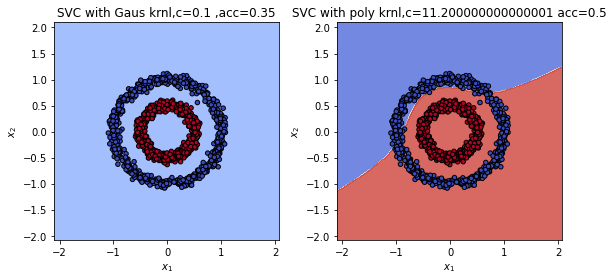

In [105]:
################  Circles Classifications ##########
    
X_test = X_circles_train
y_test = y_circles_train

#calculate the optimal c    
c_rbf=calculate_optimal_param(values,'rbf',X_test, y_test, X_circles_valid, y_circles_valid)   
c_poly = calculate_optimal_param(values, 'poly', X_test, y_test, X_circles_valid, y_circles_valid)

#calculate the optimal gamma
gamma_rbf = calculate_optimal_param(values2, 'rbf', X_test, y_test, X_circles_valid, y_circles_valid)
gamma_poly = calculate_optimal_param(values2, 'poly', X_test, y_test, X_circles_valid, y_circles_valid)

#generate the model according to  the optimal c and the optimal gamma
svc_rbf=svm.SVC(C=c_rbf, gamma = gamma_rbf, kernel='rbf')
svc_poly=svm.SVC(C=c_poly, gamma = gamma_poly, kernel='poly')

#calculate the acctacy
accuracy_rbf=calculate_accuracy(svc_rbf, X_test, y_test, X_circles_valid, y_circles_valid)
accuracy_poly=calculate_accuracy(svc_poly,  X_test, y_test, X_circles_valid, y_circles_valid)

# models 
models = (svc_rbf,svc_poly)


# title for the plots
titles = ('SVC with Gaus krnl,c='+str(c_rbf)+' ,acc='+str(accuracy_rbf)\
              , 'SVC with poly krnl,c='+str(c_poly)+' acc='+str(accuracy_poly))
print('####################### Circles Classifications ####################')    
plot_datasets(X_test,y_test,models,titles)